
# UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia

MODELOS Y SIMULACIÓN DE SISTEMAS I

INGENIERÍA DE SISTEMAS VIRTUAL

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #visualization

**Loading Data**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
# Downloading Datasets:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 707MB/s]


In [ ]:
# See the content:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [ ]:
# Extract the data:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


**Exploring data**

In [ ]:
# Reading data
train = pd.read_csv('train.csv')
train.shape

(692500, 21)

In [ ]:
train.head().iloc[:, :7]

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3


In [ ]:
train.head().iloc[:, 7:14]

,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR
0,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si
1,No,Técnica o tecnológica completa,Si,No,N,No,Si
2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No
3,Si,No sabe,Si,No,N,No,Si
4,Si,Primaria completa,Si,Si,N,No,Si


In [ ]:
train.head().iloc[:, 14:21]

,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


**Understand `NaN` values are present**

In [ ]:
print(train.isna().sum().sort_values(ascending=False))

FAMI_TIENEAUTOMOVIL               43623
FAMI_TIENELAVADORA                39773
FAMI_TIENECOMPUTADOR              38103
FAMI_ESTRATOVIVIENDA              32137
ESTU_HORASSEMANATRABAJA           30857
FAMI_TIENEINTERNET.1              26629
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONMADRE               23664
FAMI_EDUCACIONPADRE               23178
ESTU_PAGOMATRICULAPROPIO           6498
ESTU_VALORMATRICULAUNIVERSIDAD     6287
PERIODO                               0
ID                                    0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRIVADO_LIBERTAD                 0
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64


## Análisis y procedimiento

In [ ]:
column_names = train.columns.tolist()
column_names

['ID',
 'PERIODO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'coef_1',
 'coef_2',
 'coef_3',
 'coef_4']

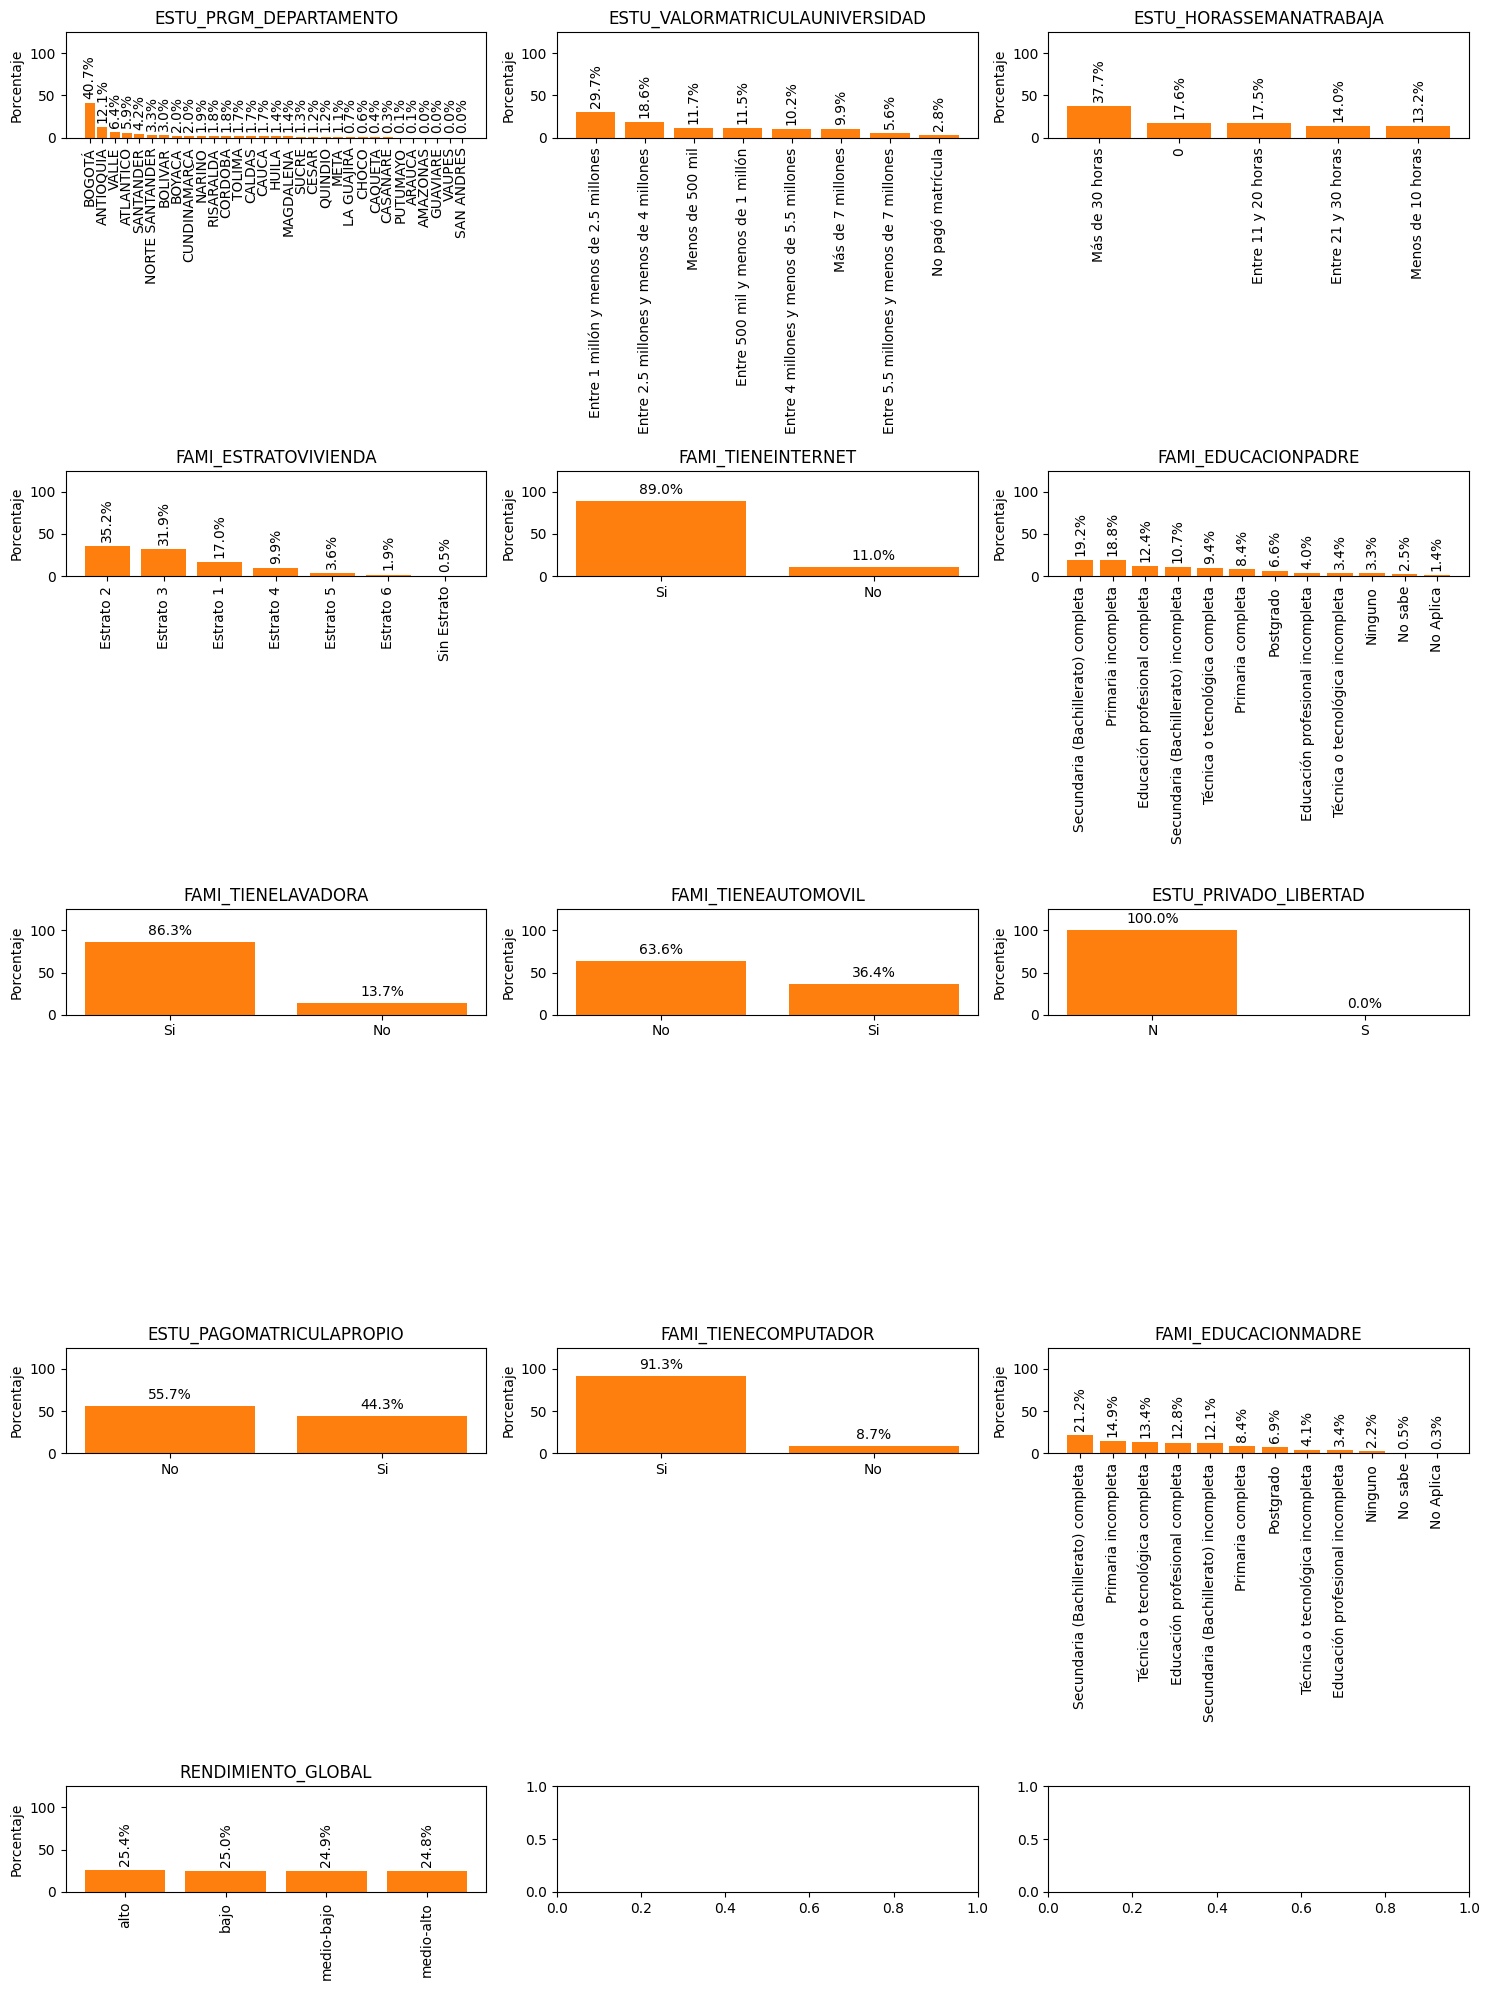

In [ ]:
cols = [
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEAUTOMOVIL',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_EDUCACIONMADRE',
    'RENDIMIENTO_GLOBAL',
]

                             # figsize=(w, h)
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, col in enumerate(cols):
    row = i // 3   # División entera para saber la fila (0 o 1)
    col_idx = i % 3  # Módulo para saber la columna (0, 1 o 2)

    s = train[col].value_counts(normalize=True) * 100

    labels = s.index.tolist()
    values = s.values.tolist()

    ax = axes[row, col_idx]
    ax.bar(labels, values)

    bars = ax.bar(labels, values)
    ax.bar_label(bars, rotation=90 if len(labels) > 2 else 0, fmt='%.1f%%', label_type='edge', padding=3)

    ax.set_ylim(0, 125)

    ax.set_ylabel('Porcentaje')
    ax.set_title(col)
    # ax.set_xticklabels(labels, rotation=90)
    ax.tick_params(axis='x', rotation=90 if len(labels) > 2 else 0)

plt.tight_layout()
plt.show()


**Remove uninformative columns**

In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [ ]:
del(train["ID"])
del(train["PERIODO"])
del(train["ESTU_PRGM_ACADEMICO"])
del(train["ESTU_PRGM_DEPARTAMENTO"])
del(train["FAMI_EDUCACIONPADRE"])
del(train["FAMI_EDUCACIONMADRE"])
del(train["FAMI_TIENELAVADORA"])
del(train["FAMI_TIENEAUTOMOVIL"])
del(train["ESTU_PRIVADO_LIBERTAD"])

del(train["FAMI_TIENEINTERNET.1"])  # Columna repetida

In [ ]:
train.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


**Fix `NaN` values**

- observe the different filling policies we decide to have

In [ ]:
for i in train.columns:
  print("%30s"%i, np.sum(train[i].isna()))

ESTU_VALORMATRICULAUNIVERSIDAD 6287
       ESTU_HORASSEMANATRABAJA 30857
          FAMI_ESTRATOVIVIENDA 32137
            FAMI_TIENEINTERNET 26629
      ESTU_PAGOMATRICULAPROPIO 6498
          FAMI_TIENECOMPUTADOR 38103
            RENDIMIENTO_GLOBAL 0
                        coef_1 0
                        coef_2 0
                        coef_3 0
                        coef_4 0


In [ ]:
train[(train['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull())].head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
174,NaN,Entre 11 y 20 horas,Estrato 2,Si,NaN,No,medio-alto,0.211,0.282,0.276,0.294
240,NaN,Menos de 10 horas,Estrato 4,Si,NaN,Si,alto,0.458,0.147,0.252,0.197
247,NaN,Entre 21 y 30 horas,Estrato 3,Si,NaN,Si,medio-bajo,0.319,0.227,0.311,0.292
499,NaN,NaN,NaN,NaN,NaN,NaN,medio-alto,0.032,0.010,0.033,0.036
565,NaN,Más de 30 horas,Estrato 6,Si,NaN,Si,alto,0.629,0.120,0.226,0.123


In [ ]:
train["ESTU_VALORMATRICULAUNIVERSIDAD"].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [ ]:
train["ESTU_VALORMATRICULAUNIVERSIDAD"].value_counts(sort=False)

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 5.5 millones y menos de 7 millones,38490
Entre 2.5 millones y menos de 4 millones,127430
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 1 millón y menos de 2.5 millones,204048
Entre 500 mil y menos de 1 millón,78704
Menos de 500 mil,80263
No pagó matrícula,19528


In [ ]:
def seleccionar_valor(column):
  seleccion = train[column].notnull()
  categorias = train[seleccion][column].unique()

  series = train[column].value_counts(sort=False)
  probabilidades = series.to_numpy()  # Convert Series to NumPy array


  categorias = categorias[:len(probabilidades)]

  total = sum(probabilidades)
  pesos = [p / total for p in probabilidades]


  return random.choices(categorias, weights=pesos, k=1)[0]

  print(categorias, len(categorias))
  print(probabilidades, len(probabilidades))
  print()

In [ ]:
seleccionar_valor("ESTU_VALORMATRICULAUNIVERSIDAD")

'Entre 5.5 millones y menos de 7 millones'

In [ ]:
seleccionar_valor("FAMI_TIENEINTERNET")

'No'

In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 9
       ESTU_HORASSEMANATRABAJA 6
          FAMI_ESTRATOVIVIENDA 8
            FAMI_TIENEINTERNET 3
      ESTU_PAGOMATRICULAPROPIO 3
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


In [ ]:
train.columns

Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

### ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
proporciones = train['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(normalize=True)
proporciones

,proportion
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,0.297354
Entre 2.5 millones y menos de 4 millones,0.185700
Menos de 500 mil,0.116965
Entre 500 mil y menos de 1 millón,0.114693
Entre 4 millones y menos de 5.5 millones,0.101624
Más de 7 millones,0.099115
Entre 5.5 millones y menos de 7 millones,0.056090
No pagó matrícula,0.028458


In [ ]:
n_missing = train['ESTU_VALORMATRICULAUNIVERSIDAD'].isna().sum()
n_missing

np.int64(6287)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['ESTU_VALORMATRICULAUNIVERSIDAD'].isna(), 'ESTU_VALORMATRICULAUNIVERSIDAD'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 6
          FAMI_ESTRATOVIVIENDA 8
            FAMI_TIENEINTERNET 3
      ESTU_PAGOMATRICULAPROPIO 3
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


### ESTU_HORASSEMANATRABAJA

In [ ]:
proporciones = train['ESTU_HORASSEMANATRABAJA'].value_counts(normalize=True)
proporciones

,proportion
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,0.376868
0,0.176152
Entre 11 y 20 horas,0.175105
Entre 21 y 30 horas,0.140095
Menos de 10 horas,0.131780


In [ ]:
n_missing = train['ESTU_HORASSEMANATRABAJA'].isna().sum()
n_missing

np.int64(30857)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['ESTU_HORASSEMANATRABAJA'].isna(), 'ESTU_HORASSEMANATRABAJA'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 5
          FAMI_ESTRATOVIVIENDA 8
            FAMI_TIENEINTERNET 3
      ESTU_PAGOMATRICULAPROPIO 3
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


### FAMI_ESTRATOVIVIENDA

In [ ]:
proporciones = train['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True)
proporciones

,proportion
FAMI_ESTRATOVIVIENDA,
Estrato 2,0.352338
Estrato 3,0.319044
Estrato 1,0.169590
Estrato 4,0.099209
Estrato 5,0.035750
Estrato 6,0.019088
Sin Estrato,0.004981


In [ ]:
n_missing = train['FAMI_ESTRATOVIVIENDA'].isna().sum()
n_missing

np.int64(32137)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['FAMI_ESTRATOVIVIENDA'].isna(), 'FAMI_ESTRATOVIVIENDA'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 5
          FAMI_ESTRATOVIVIENDA 7
            FAMI_TIENEINTERNET 3
      ESTU_PAGOMATRICULAPROPIO 3
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


### FAMI_TIENEINTERNET

In [ ]:
proporciones = train['FAMI_TIENEINTERNET'].value_counts(normalize=True)
proporciones

,proportion
FAMI_TIENEINTERNET,
Si,0.889833
No,0.110167


In [ ]:
n_missing = train['FAMI_TIENEINTERNET'].isna().sum()
n_missing

np.int64(26629)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['FAMI_TIENEINTERNET'].isna(), 'FAMI_TIENEINTERNET'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 5
          FAMI_ESTRATOVIVIENDA 7
            FAMI_TIENEINTERNET 2
      ESTU_PAGOMATRICULAPROPIO 3
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


### ESTU_PAGOMATRICULAPROPIO

In [ ]:
proporciones = train['ESTU_PAGOMATRICULAPROPIO'].value_counts(normalize=True)
proporciones

,proportion
ESTU_PAGOMATRICULAPROPIO,
No,0.557143
Si,0.442857


In [ ]:
n_missing = train['ESTU_PAGOMATRICULAPROPIO'].isna().sum()
n_missing

np.int64(6498)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['ESTU_PAGOMATRICULAPROPIO'].isna(), 'ESTU_PAGOMATRICULAPROPIO'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 5
          FAMI_ESTRATOVIVIENDA 7
            FAMI_TIENEINTERNET 2
      ESTU_PAGOMATRICULAPROPIO 2
          FAMI_TIENECOMPUTADOR 3
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


### FAMI_TIENECOMPUTADOR

In [ ]:
proporciones = train['FAMI_TIENECOMPUTADOR'].value_counts(normalize=True)
proporciones

,proportion
FAMI_TIENECOMPUTADOR,
Si,0.913314
No,0.086686


In [ ]:
n_missing = train['FAMI_TIENECOMPUTADOR'].isna().sum()
n_missing

np.int64(38103)

In [ ]:
import numpy as np

valores_a_rellenar = np.random.choice(
    proporciones.index,       # categorías únicas
    size=n_missing,           # cuántos valores faltan
    p=proporciones.values     # probabilidades correspondientes
)


In [ ]:
train.loc[train['FAMI_TIENECOMPUTADOR'].isna(), 'FAMI_TIENECOMPUTADOR'] = valores_a_rellenar

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
for i in train.columns:
  print("%30s"%i, len(train[i].unique()))

ESTU_VALORMATRICULAUNIVERSIDAD 8
       ESTU_HORASSEMANATRABAJA 5
          FAMI_ESTRATOVIVIENDA 7
            FAMI_TIENEINTERNET 2
      ESTU_PAGOMATRICULAPROPIO 2
          FAMI_TIENECOMPUTADOR 2
            RENDIMIENTO_GLOBAL 4
                        coef_1 375
                        coef_2 342
                        coef_3 196
                        coef_4 276


# Sigue transformación de todos los datos para entrenar modelo

**Turn categorical columns to a `one_hot` encoding**

In [ ]:
def to_onehot(x):
  values = np.unique(x)
  r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
  return np.eye(len(values))[r].astype(int)

In [ ]:
def replace_columns_with_onehot(d, col):
  k = to_onehot(d[col].values)
  r = pd.DataFrame(k, columns=["%s_%d"%(col, i) for i in range(k.shape[1])], index=d.index).join(d)
  del(r[col])
  return r

In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
train = replace_columns_with_onehot(train, "ESTU_VALORMATRICULAUNIVERSIDAD")
train.head()

In [ ]:
train = replace_columns_with_onehot(train, "ESTU_HORASSEMANATRABAJA")
train.head()

,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_1,ESTU_HORASSEMANATRABAJA_2,ESTU_HORASSEMANATRABAJA_3,ESTU_HORASSEMANATRABAJA_4,ESTU_VALORMATRICULAUNIVERSIDAD_0,ESTU_VALORMATRICULAUNIVERSIDAD_1,ESTU_VALORMATRICULAUNIVERSIDAD_2,ESTU_VALORMATRICULAUNIVERSIDAD_3,ESTU_VALORMATRICULAUNIVERSIDAD_4,...,ESTU_VALORMATRICULAUNIVERSIDAD_7,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,0,0,0,1,0,0,0,0,1,0,...,0,Estrato 3,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,1,0,0,0,0,0,1,0,0,0,...,0,Estrato 3,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,0,0,0,0,1,0,1,0,0,0,...,0,Estrato 3,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,1,0,0,0,0,0,0,1,0,0,...,0,Estrato 4,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,0,0,1,0,0,0,1,0,0,0,...,0,Estrato 3,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
train = replace_columns_with_onehot(train, "FAMI_ESTRATOVIVIENDA")
train.head()

,FAMI_ESTRATOVIVIENDA_0,FAMI_ESTRATOVIVIENDA_1,FAMI_ESTRATOVIVIENDA_2,FAMI_ESTRATOVIVIENDA_3,FAMI_ESTRATOVIVIENDA_4,FAMI_ESTRATOVIVIENDA_5,FAMI_ESTRATOVIVIENDA_6,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_1,ESTU_HORASSEMANATRABAJA_2,...,ESTU_VALORMATRICULAUNIVERSIDAD_6,ESTU_VALORMATRICULAUNIVERSIDAD_7,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,0,0,1,0,0,0,0,0,0,0,...,0,0,Si,No,Si,medio-alto,0.322,0.208,0.310,0.267
1,0,0,1,0,0,0,0,1,0,0,...,0,0,No,No,Si,bajo,0.311,0.215,0.292,0.264
2,0,0,1,0,0,0,0,0,0,0,...,0,0,Si,No,No,bajo,0.297,0.214,0.305,0.264
3,0,0,0,1,0,0,0,1,0,0,...,0,0,Si,No,Si,alto,0.485,0.172,0.252,0.190
4,0,0,1,0,0,0,0,0,0,1,...,0,0,Si,No,Si,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
# FAMI_TIENEINTERNET	ESTU_PAGOMATRICULAPROPIO	FAMI_TIENECOMPUTADOR
train['FAMI_TIENEINTERNET'] = train['FAMI_TIENEINTERNET'].replace({'Si': 1, 'No': 0})
train['ESTU_PAGOMATRICULAPROPIO'] = train['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No': 0})
train['FAMI_TIENECOMPUTADOR'] = train['FAMI_TIENECOMPUTADOR'].replace({'Si': 1, 'No': 0})
train.head()

<ipython-input-517-0c87e4d36cc5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ESTU_PAGOMATRICULAPROPIO'] = train['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No': 0})
<ipython-input-517-0c87e4d36cc5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['FAMI_TIENECOMPUTADOR'] = train['FAMI_TIENECOMPUTADOR'].replace({'Si': 1, 'No': 0})


,FAMI_ESTRATOVIVIENDA_0,FAMI_ESTRATOVIVIENDA_1,FAMI_ESTRATOVIVIENDA_2,FAMI_ESTRATOVIVIENDA_3,FAMI_ESTRATOVIVIENDA_4,FAMI_ESTRATOVIVIENDA_5,FAMI_ESTRATOVIVIENDA_6,ESTU_HORASSEMANATRABAJA_0,ESTU_HORASSEMANATRABAJA_1,ESTU_HORASSEMANATRABAJA_2,...,ESTU_VALORMATRICULAUNIVERSIDAD_6,ESTU_VALORMATRICULAUNIVERSIDAD_7,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,medio-alto,0.322,0.208,0.310,0.267
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,bajo,0.311,0.215,0.292,0.264
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,bajo,0.297,0.214,0.305,0.264
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,alto,0.485,0.172,0.252,0.190
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,medio-bajo,0.316,0.232,0.285,0.294


### Put all transformations together

In [ ]:
import numpy as np
import pandas as pd

def rellenar_categoricos_con_proporcion(df, columna):
    """
    Rellena los valores faltantes en una columna categórica de un DataFrame
    manteniendo la distribución proporcional de los valores existentes.

    Parámetros:
    - df: pd.DataFrame - El DataFrame que contiene la columna.
    - columna: str - El nombre de la columna a procesar.

    Retorna:
    - df: pd.DataFrame - El DataFrame con los valores faltantes de la columna rellenados.
    """
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    # Calcular proporciones de cada categoría existente
    proporciones = df[columna].value_counts(normalize=True, dropna=True)

    # Contar valores faltantes
    n_missing = df[columna].isna().sum()

    if n_missing == 0:
        print(f"No hay valores faltantes en la columna '{columna}'.")
        return df

    # Generar nuevas muestras categóricas según la proporción original
    valores_a_rellenar = np.random.choice(
        proporciones.index,
        size=n_missing,
        p=proporciones.values
    )

    # Asignar los nuevos valores a las posiciones faltantes
    df.loc[df[columna].isna(), columna] = valores_a_rellenar

    return df


In [ ]:
def clean_dataset(d):
    del(d["ID"])
    del(d["PERIODO"])
    del(d["ESTU_PRGM_ACADEMICO"])
    del(d["ESTU_PRGM_DEPARTAMENTO"])
    del(d["FAMI_EDUCACIONPADRE"])
    del(d["FAMI_EDUCACIONMADRE"])
    del(d["FAMI_TIENELAVADORA"])
    del(d["FAMI_TIENEAUTOMOVIL"])
    del(d["ESTU_PRIVADO_LIBERTAD"])
    del(d["FAMI_TIENECOMPUTADOR"])

    del(d["FAMI_TIENEINTERNET.1"])  # Columna repetida


    d = rellenar_categoricos_con_proporcion(d, "ESTU_VALORMATRICULAUNIVERSIDAD")
    d = rellenar_categoricos_con_proporcion(d, "ESTU_HORASSEMANATRABAJA")
    d = rellenar_categoricos_con_proporcion(d, "FAMI_ESTRATOVIVIENDA")
    d = rellenar_categoricos_con_proporcion(d, "FAMI_TIENEINTERNET")
    d = rellenar_categoricos_con_proporcion(d, "ESTU_PAGOMATRICULAPROPIO")
    # d = rellenar_categoricos_con_proporcion(d, "FAMI_TIENECOMPUTADOR")

    d = replace_columns_with_onehot(d, "FAMI_ESTRATOVIVIENDA")
    d = replace_columns_with_onehot(d, "ESTU_HORASSEMANATRABAJA")
    d = replace_columns_with_onehot(d, "ESTU_VALORMATRICULAUNIVERSIDAD")


    binario = {'Si': 1, 'No': 0}
    d['FAMI_TIENEINTERNET'] = d['FAMI_TIENEINTERNET'].map(binario)
    d['ESTU_PAGOMATRICULAPROPIO'] = d['ESTU_PAGOMATRICULAPROPIO'].map(binario)
    # d['FAMI_TIENECOMPUTADOR'] = d['FAMI_TIENECOMPUTADOR'].map(binario)



    # Normalización de columnas numéricas
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    d[['coef_1', 'coef_2', 'coef_3', 'coef_4']] = scaler.fit_transform(d[['coef_1', 'coef_2', 'coef_3', 'coef_4']])


    return d

**transform train and test data together**

- observe that test data **does not have** a `RENDIMIENTO_GLOBAL` column. This is the result to submit to Kaggle

In [ ]:
dtr = pd.read_csv("train.csv")
dts = pd.read_csv("test.csv")
lentr = len(dtr)
dtr.shape, dts.shape

((692500, 21), (296786, 20))

In [ ]:
# Codificación ordinal para RENDIMIENTO_GLOBAL
rendimiento_mapping = {
  'bajo': 0,
  'medio-bajo': 1,
  'medio-alto': 2,
  'alto': 3
  }
dtr['RENDIMIENTO_GLOBAL'] = dtr['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)

In [ ]:
dtr.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,2,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,0,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,0,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,3,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,1,0.316,0.232,0.285,0.294


In [ ]:
dts.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


**get data ready for training**

In [ ]:
source_cols = [i for i in dtr.columns if i!="RENDIMIENTO_GLOBAL"]
# source_cols = [i for i in dtr.columns if i not in my_list]
all_data = pd.concat((dtr[source_cols], dts[source_cols]))
all_data.index = range(len(all_data))
all_data = clean_dataset(all_data)

In [ ]:
print(all_data.isna().sum().sort_values(ascending=False))

ESTU_VALORMATRICULAUNIVERSIDAD_0    0
ESTU_VALORMATRICULAUNIVERSIDAD_1    0
ESTU_VALORMATRICULAUNIVERSIDAD_2    0
ESTU_VALORMATRICULAUNIVERSIDAD_3    0
ESTU_VALORMATRICULAUNIVERSIDAD_4    0
ESTU_VALORMATRICULAUNIVERSIDAD_5    0
ESTU_VALORMATRICULAUNIVERSIDAD_6    0
ESTU_VALORMATRICULAUNIVERSIDAD_7    0
ESTU_HORASSEMANATRABAJA_0           0
ESTU_HORASSEMANATRABAJA_1           0
ESTU_HORASSEMANATRABAJA_2           0
ESTU_HORASSEMANATRABAJA_3           0
ESTU_HORASSEMANATRABAJA_4           0
FAMI_ESTRATOVIVIENDA_0              0
FAMI_ESTRATOVIVIENDA_1              0
FAMI_ESTRATOVIVIENDA_2              0
FAMI_ESTRATOVIVIENDA_3              0
FAMI_ESTRATOVIVIENDA_4              0
FAMI_ESTRATOVIVIENDA_5              0
FAMI_ESTRATOVIVIENDA_6              0
FAMI_TIENEINTERNET                  0
ESTU_PAGOMATRICULAPROPIO            0
coef_1                              0
coef_2                              0
coef_3                              0
coef_4                              0
dtype: int64

In [ ]:
Xtr, ytr = all_data.iloc[:lentr].values, dtr["RENDIMIENTO_GLOBAL"].values
Xts      = all_data.iloc[lentr:].values

print (Xtr.shape, ytr.shape)
print (Xts.shape)

(692500, 26) (692500,)
(296786, 26)


In [ ]:
ytr

array([2, 0, 0, ..., 1, 0, 3])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Xtr, ytr, test_size=0.2, stratify=ytr, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=40, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.33870036101083034

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.35      0.40      0.37     34597
           1       0.28      0.26      0.27     34455
           2       0.27      0.23      0.25     34324
           3       0.44      0.46      0.45     35124

    accuracy                           0.34    138500
   macro avg       0.33      0.34      0.33    138500
weighted avg       0.33      0.34      0.34    138500


Matriz de Confusión:
 [[13860  9292  6597  4848]
 [11367  9078  7569  6441]
 [ 8928  8278  7852  9266]
 [ 5749  5800  7455 16120]]
